Summarise COVID-19 Data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
file = 'covid19.csv'
moving_avg = 14
scale = 0.01
min_day = '2021-03-01' 
max_day = '2021-04-30'
groups = ['05_09', '10_14', '15_19']
interventions = [
    ('2022-02-23', 'Rules scrapped'),
    ('2021-01-05', 'Closed'),
    ('2021-03-08', 'Reopened w/ Testing'),
    ('2020-03-20', 'Closed'),
    ('2020-09-01', 'Reopened'),
    ('2022-01-02', 'Masks ^'),
    ('2020-11-05', 'Interventions')
]

In [23]:
data = pd.read_csv(file).drop(columns=['areaCode', 'areaName', 'areaType', 'rollingSum', 'rollingRate'])
data = data[data.age.isin(groups)]
data = data.groupby(by=['date']).sum('cases').reset_index()
data['cases'] = data['cases'] * scale
data['moving_avg'] = 0

for i in range(moving_avg, data.shape[0]):
    total = 0
    for j in range(i - moving_avg, i) : total += data.loc[j, 'cases']
    data.at[i, 'moving_avg'] = total / moving_avg

In [24]:
def get_day(date, default):
    days = np.array(data['date'])
    index = np.argwhere(days == date).flatten()
    if len(index) > 0 : return index[0]
    else : return default

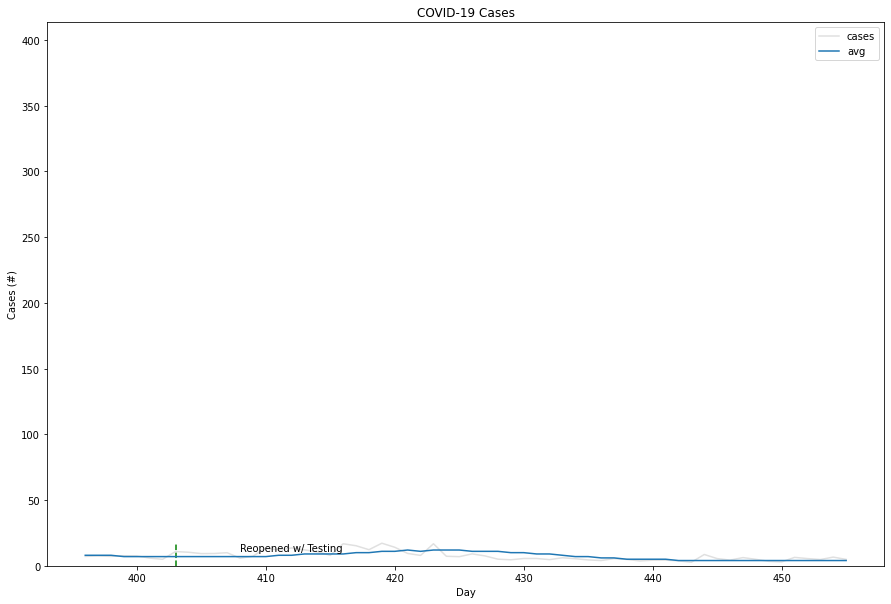

In [25]:
fig, ax = plt.subplots(figsize=(15, 10))

days = np.array(data.index)
cases = np.array(data['cases'])
avg = np.array(data['moving_avg'])

maxi = max(cases)

lower = get_day(min_day, 0)
upper = get_day(max_day, len(days))

days = days[lower:upper]
cases = cases[lower:upper]
avg = avg[lower:upper]

ax.plot(days, cases, label='cases', c='#e0e0e0')
ax.plot(days, avg, label='avg')

for (d, i) in interventions:
    v = get_day(d, None)
    if v is not None and v > lower and v < upper:
        ax.text(v+5, max(cases) * 1, i, rotation=0, verticalalignment='top', horizontalalignment='left')
        ax.vlines(v, 0, max(cases), colors='g', linestyles='dashed')

plt.title('COVID-19 Cases')
plt.xlabel('Day')
plt.ylabel('Cases (#)')
plt.ylim(bottom=0, top=maxi)
plt.legend()
plt.show()